In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from tvemoves_rufbad.simulation import Simulation, SimulationParams
from tvemoves_rufbad.domain import RectangleDomain
import math

In [3]:
fps = 0.05
tau = 1 / fps
eps = 1 / 8
params = SimulationParams(initial_temperature=0.0, search_radius=100.0, fps=fps, scale=eps)
domain = RectangleDomain(width=1.0, height=1.0, fix=["lower"])


def external_temperature(t: float):
    if t < 2 * tau:
        return 0.0
    return 1.0


def boundary_traction(t: float, x: float, y: float):
    if t < 5 * tau and y > 1.0 - eps / 2:
        return [0.0, 5.0 * math.exp(-100*(x - 0.5)**2)]
    return [0.0, 0.0]


sim = Simulation(domain, params, external_temperature, boundary_traction)

In [4]:
sim.run(num_steps=4)

100%|██████████| 4/4 [32:41<00:00, 490.33s/it]


In [5]:
sim.max_temp()

0.9920073321452166

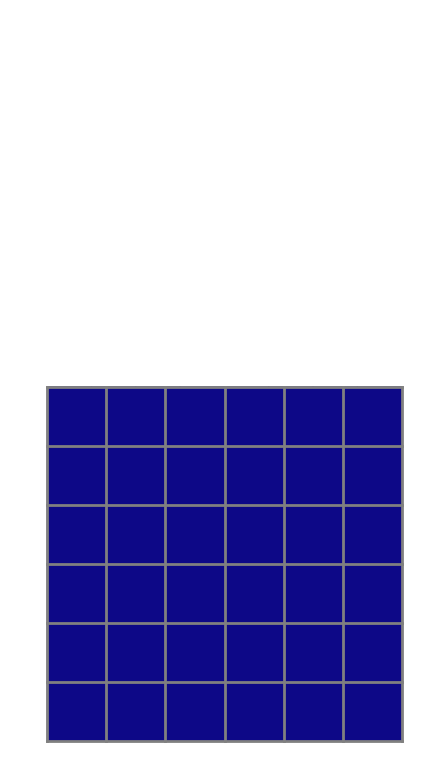

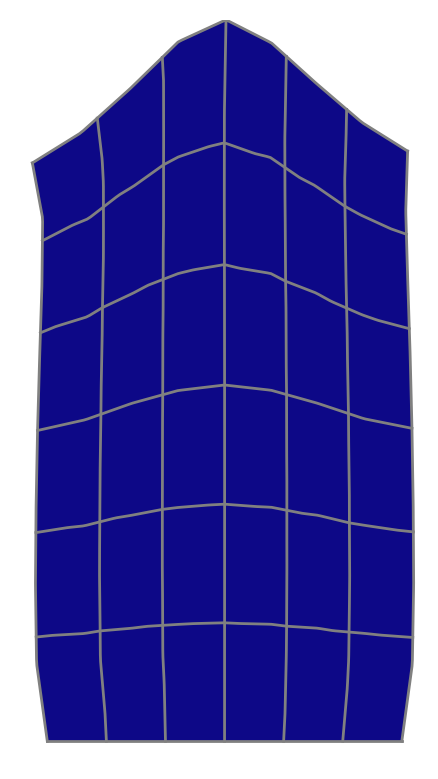

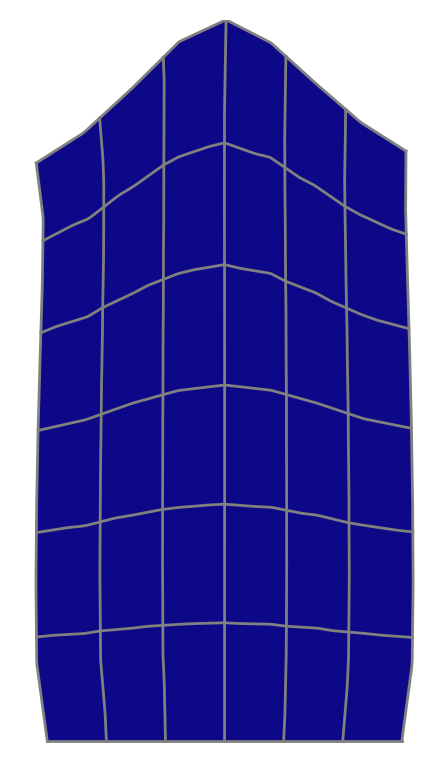

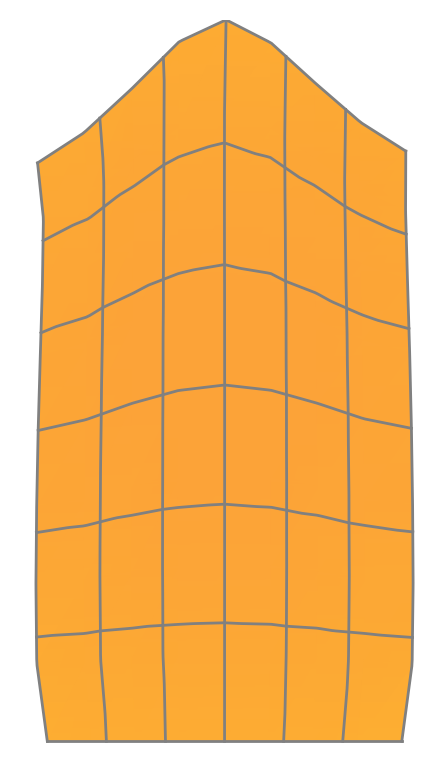

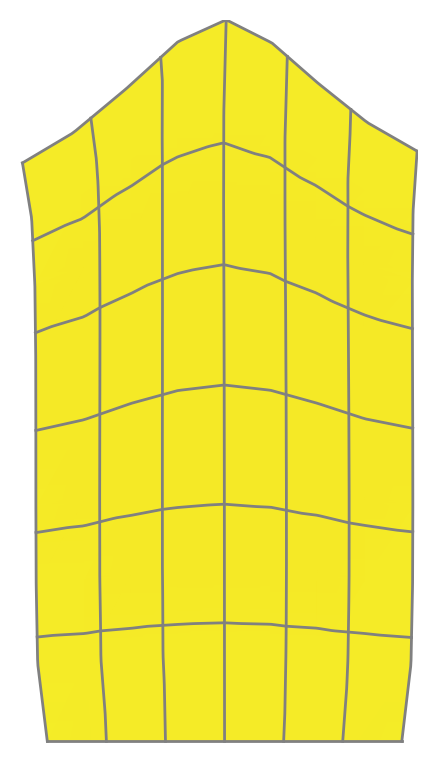

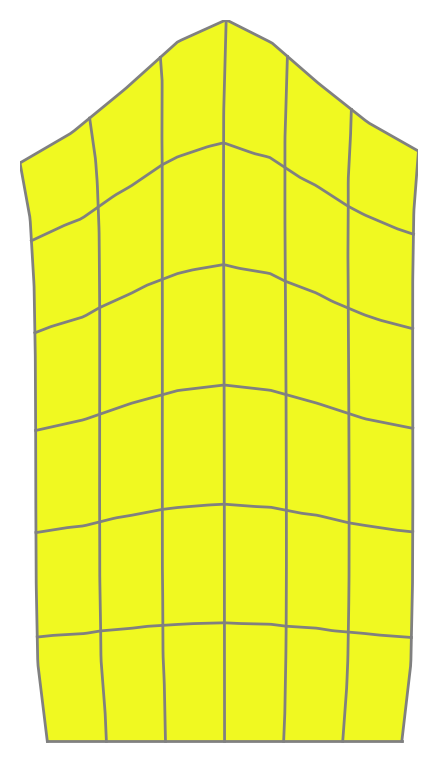

In [6]:
for i in range(len(sim.steps)):
    sim.plot_step(i)